In [1]:
from time import sleep
from datetime import datetime
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np
import pandas as pd
import os
import pickle
import ast
import shap
import re
import matplotlib.pyplot as plt
from joblib import dump, load
from tqdm import tqdm
from hypermapper import optimizer
%matplotlib inline

In [2]:
print("hello")

hello


In [2]:
df = pd.read_csv('sampled_merged.csv', sep=',')

 /tmp/ipykernel_3186818/467423955.py:1: DtypeWarning:Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


In [3]:
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed_label
0,1.547146e+09,CAzMI83BafES3UxXQh,192.168.1.198,29360,77.253.134.231,23,tcp,NaN,NaN,NaN,...,NaN,0,S,1,40,0,0,NaN,Benign,-
1,1.532148e+09,Cf6lGE3NJfMIs6843j,192.168.100.108,5526,73.116.245.113,37215,tcp,NaN,NaN,NaN,...,NaN,0,S,1,40,0,0,NaN,Malicious,Okiru
2,1.545392e+09,CcIIIpnojaNgIYBP5,192.168.1.197,43746,212.94.164.250,80,tcp,NaN,NaN,NaN,...,NaN,0,S,1,40,0,0,NaN,Malicious,PartOfAHorizontalPortScan
3,1.547076e+09,CmMz5S1in636MWW1x8,192.168.1.194,46955,165.123.188.175,22,tcp,NaN,NaN,NaN,...,NaN,0,S,1,40,0,0,NaN,Malicious,PartOfAHorizontalPortScan
4,1.545413e+09,CaWT0l3PiHdj3P0cel,192.168.1.197,44002,156.191.45.10,52869,tcp,NaN,NaN,NaN,...,NaN,0,S,1,40,0,0,NaN,Malicious,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.536240e+09,CnjfmN3xY5os9Azesg,192.168.100.111,17832,156.230.175.157,37215,tcp,NaN,0.000002,0.0,...,NaN,0,S,2,80,0,0,NaN,Malicious,Okiru
999996,1.547081e+09,CsAJwm2tCsOUDEhluf,192.168.1.194,42945,216.71.60.170,22,tcp,NaN,NaN,NaN,...,NaN,0,S,1,40,0,0,NaN,Malicious,PartOfAHorizontalPortScan
999997,1.536230e+09,CkCFNA1vt0yuV0aFg9,192.168.100.111,17832,156.189.123.231,37215,tcp,NaN,0.000002,0.0,...,NaN,0,S,2,80,0,0,NaN,Malicious,Okiru
999998,1.547145e+09,ClOHWL3nwzdvl1DZT5,192.168.1.198,32810,91.197.136.15,52869,tcp,NaN,NaN,NaN,...,NaN,0,S,1,40,0,0,NaN,Malicious,PartOfAHorizontalPortScan


In [4]:
label_set = ['label', 'ip_label']
df['ip_label'] = df['id.orig_h'].astype('category').cat.codes
df[label_set]


,label,ip_label
0,Benign,73
1,Malicious,77
2,Malicious,72
3,Malicious,69
4,Malicious,72
...,...,...
999995,Malicious,78
999996,Malicious,69
999997,Malicious,78
999998,Malicious,73


In [5]:
benign_orig_pkts = df[(df['label']=='Benign')|(df['label']=='benign')]['orig_pkts']
malicious_orig_pkts = df[df['label']=='Malicious']['orig_pkts']

In [17]:
len(df_cleaned['ip_label'].unique())

31

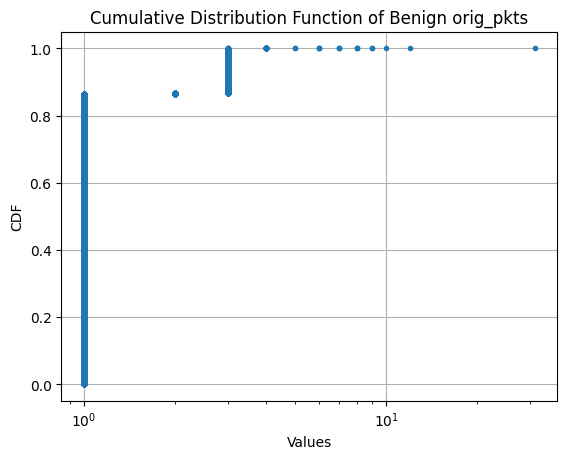

In [8]:
# cdf of benign malicious
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sort the data in the column
sorted_data = np.sort(benign_orig_pkts)

# Compute the CDF values
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the CDF
plt.plot(sorted_data, cdf, marker='.', linestyle='none')
plt.xscale('log')
plt.xlabel('Values')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Benign orig_pkts')
plt.grid()
plt.show()

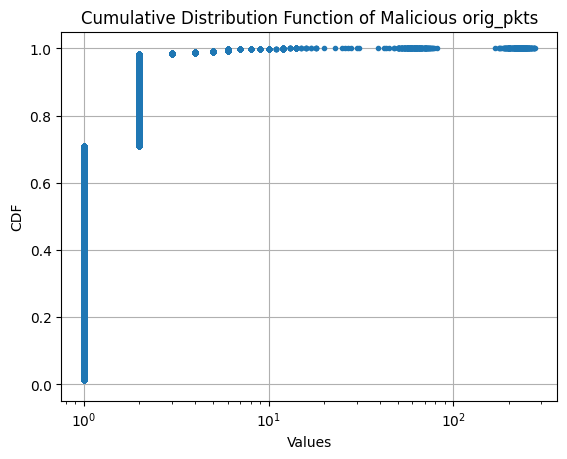

In [9]:
# cdf of benign malicious
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sort the data in the column
sorted_data = np.sort(malicious_orig_pkts)

# Compute the CDF values
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the CDF
plt.plot(sorted_data, cdf, marker='.', linestyle='none')
plt.xscale('log')
plt.xlabel('Values')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Malicious orig_pkts')
plt.grid()
plt.show()

In [10]:
feature_set = ['duration','orig_bytes','resp_bytes','conn_state','history','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes','label','ip_label']
df_cleaned = df[feature_set].dropna()

In [14]:
df_cleaned['conn_state'] = df_cleaned['conn_state'].astype('category').cat.codes
df_cleaned['history'] = df_cleaned['history'].astype('category').cat.codes
df_cleaned['label'] = df_cleaned['label'].replace({'benign': 0, 'Benign': 0, 'Malicious': 1})

 /tmp/ipykernel_3186818/992113227.py:3: FutureWarning:Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [16]:
from sklearn.model_selection import train_test_split

df_train, df_cvtest = train_test_split(df_cleaned, test_size=0.3, random_state=42)
df_cv, df_test = train_test_split(df_cvtest, test_size=0.5, random_state=42)
df_X_train = df_train.iloc[:, :-2]
df_Y_train = df_train.iloc[:, -2:]
df_X_test = df_test.iloc[:, :-2]
df_Y_test = df_test.iloc[:, -2:]

In [47]:
# on original sampled dataset
source_model = RandomForestClassifier(random_state=42)
source_model.fit(df_X_train.iloc[:, 5].to_numpy().reshape(-1, 1), df_Y_train.iloc[:, 0].to_numpy())
df_pred = source_model.predict(df.iloc[:, 5].to_numpy().reshape(-1, 1))
accuracy_score(df['label'].replace({'benign': 0, 'Benign': 0, 'Malicious': 1}), df_pred)

 /tmp/ipykernel_784794/1141848015.py:4: FutureWarning:Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


0.905447

In [22]:
# on cleaned dataset
source_model = RandomForestClassifier(random_state=42)
source_model.fit(df_X_train.iloc[:, 5].to_numpy().reshape(-1, 1), df_Y_train.iloc[:, 0].to_numpy())
df_pred = source_model.predict(df_cleaned.iloc[:, 5].to_numpy().reshape(-1, 1))
accuracy_score(df_cleaned['label'].replace({'benign': 0, 'Benign': 0, 'Malicious': 1}), df_pred)

0.990328469140014

In [19]:
# on cleaned dataset, KNN
source_model = KNeighborsClassifier(n_neighbors=3)
source_model.fit(df_X_train.iloc[:, 5].to_numpy().reshape(-1, 1), df_Y_train.iloc[:, 0].to_numpy())
df_pred = source_model.predict(df_cleaned.iloc[:, 5].to_numpy().reshape(-1, 1))
accuracy_score(df_cleaned['label'].replace({'benign': 0, 'Benign': 0, 'Malicious': 1}), df_pred)

0.990328469140014

In [7]:
for i in range(df_cleaned.shape[1]):
    print(df_cleaned.columns[i], df_cleaned.iloc[:, i].unique())

duration [1.000000e-06 2.000000e-06 5.000000e-06 ... 4.102924e+00 3.142471e+00
 1.977373e+00]
orig_bytes [0.00000000e+00 1.02400000e+03 9.00000000e+01 4.80000000e+01
 4.08302871e+10 5.30000000e+03 2.04800000e+03 6.17500000e+03
 4.71023926e+10 2.18080237e+10 2.75695142e+10 3.85000000e+02
 9.60000000e+01 3.12677787e+10 1.56000000e+02 3.44626211e+10
 3.78174651e+10 3.76142566e+10 5.55000000e+03 5.77500000e+03
 3.06279703e+10 5.89000000e+02 4.07384551e+10 6.70000000e+01
 5.45000000e+03 5.47500000e+03 6.55000000e+03 2.88507053e+10
 5.97500000e+03 1.84686791e+10 5.52500000e+03 5.67500000e+03
 2.90952622e+10 1.53600000e+03 1.47400000e+03 2.81349758e+10
 5.92500000e+03 6.22500000e+03 5.17500000e+03 1.34000000e+02
 5.80000000e+03 7.00000000e+01 2.91982800e+10 4.40000000e+03
 6.36000000e+02 6.50000000e+03 1.80000000e+02 4.21000000e+02
 7.80000000e+01 6.00000000e+03 3.36123540e+10 3.51033287e+10
 4.90000000e+03 3.58774240e+10 1.80000000e+01 1.06000000e+02
 5.95000000e+03 2.57110161e+10 2.56637997

 /tmp/ipykernel_784794/992113227.py:3: FutureWarning:Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [13]:
df_cleaned

,duration,orig_bytes,resp_bytes,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,ip_label
5,0.000001,0.0,0.0,6,7,2,80,0,0,1,78
6,0.000002,0.0,0.0,6,7,2,80,0,0,1,78
11,0.000002,0.0,0.0,6,7,2,80,0,0,1,78
12,0.000002,0.0,0.0,6,7,2,80,0,0,1,78
14,0.000005,0.0,0.0,6,7,2,80,0,0,1,78
...,...,...,...,...,...,...,...,...,...,...,...
999986,0.000005,0.0,0.0,6,7,2,80,0,0,1,78
999991,0.000002,0.0,0.0,6,7,2,80,0,0,1,78
999995,0.000002,0.0,0.0,6,7,2,80,0,0,1,78
999997,0.000002,0.0,0.0,6,7,2,80,0,0,1,78


In [15]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from joblib import dump, load
def get_accuracy_for_feat_subset(df_X_train, df_X_test, df_Y_train, df_Y_test, feat_idx, custom_text_ext):
    print(feat_idx)
    if not feat_idx:
        return 1, 0.00001
    new_train = df_X_train[:, feat_idx]
    new_test = df_X_test[:, feat_idx]
    threat_model = RandomForestClassifier(random_state=42)
    threat_model.fit(new_train, df_Y_train.iloc[:, 1].to_numpy())
    source_model = RandomForestClassifier(random_state=42)
    source_model.fit(new_train, df_Y_train.iloc[:, 0].to_numpy())
    threat_pred_new = threat_model.predict(new_test)
    source_pred_new = source_model.predict(new_test)
    threat_score = accuracy_score(df_Y_test.iloc[:, 1].to_numpy(), threat_pred_new)  # Source IP re-id classifier (Threat)
    source_score = accuracy_score(df_Y_test.iloc[:, 0].to_numpy(), source_pred_new) # Network Intrusion classifier
    return threat_score, source_score

In [16]:
parameters_file = "hypermapper-param-sampled.json"
def bayesian_opt(X):
    feat_idx = []
    for i in range(1, 10):
        if X[f'f{i}'] == 'true':
            feat_idx.append(i-1)
    threat_score, source_score = get_accuracy_for_feat_subset(df_X_train.to_numpy(), df_X_test.to_numpy(), df_Y_train, df_Y_test, feat_idx, 'bayesian')
    print("Source accuracy and threat accuracy:", source_score, threat_score)
    return threat_score/source_score
value_at_optimum = optimizer.optimize(parameters_file, bayesian_opt)

Design of experiment phase, number of new doe samples = 512 .......
[2, 3, 4, 8]
Source accuracy and threat accuracy: 0.9515641255171413 0.6270776377228848
[]
Source accuracy and threat accuracy: 1e-05 1
[8]
Source accuracy and threat accuracy: 0.9513705755691578 0.6060532746231825
[7]
Source accuracy and threat accuracy: 0.9514915442866475 0.6060048871361866
[7, 8]
Source accuracy and threat accuracy: 0.9514431567996516 0.6060774683666804
[6]
Source accuracy and threat accuracy: 0.9962741635013186 0.7147073766723925
[6, 8]
Source accuracy and threat accuracy: 0.9963467447318124 0.7148283453898822
[6, 7]
Source accuracy and threat accuracy: 0.9963467447318124 0.7148041516463842
[6, 7, 8]
Source accuracy and threat accuracy: 0.9963467447318124 0.7148283453898822
[5]
Source accuracy and threat accuracy: 0.9905402462923089 0.6980620811458157
[5, 8]
Source accuracy and threat accuracy: 0.9907821837272881 0.6982314373503012
[5, 7]
Source accuracy and threat accuracy: 0.9907821837272881 0.69